In [8]:
# Install (if needed)
# !pip install nltk pandas matplotlib seaborn

# --- IMPORTS ---
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords

# --- FIXED: NLTK DOWNLOADS ---
import nltk
nltk.download("punkt")
nltk.download("averaged_perceptron_tagger")
nltk.download("averaged_perceptron_tagger_eng")  # 👈 NEW!
nltk.download("stopwords")



[nltk_data] Downloading package punkt to /Users/alden/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/alden/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /Users/alden/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package stopwords to /Users/alden/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
# --- LOAD DATA ---
df = pd.read_csv("20th_century_cleaned_events.csv")

# Preview
print("✅ Loaded event data:")
df.head()



✅ Loaded event data:


,event
0,The20th centurywas the century that began on ...
1,The 20th century was dominated by significant ...
2,Major themes of the century includeddecoloniza...
3,"At the beginning of the period, theBritish Emp..."
4,Technological advancements duringWorld War Ich...


In [6]:
# --- JOIN ALL EVENTS TOGETHER ---
text = " ".join(df["event"].astype(str).tolist())

# --- TOKENIZE WORDS ---
tokens = word_tokenize(text)
tokens = [t.lower() for t in tokens if t.isalpha()]

# Show sample
print("✅ Tokens preview:", tokens[:15])


✅ Tokens preview: ['centurywas', 'the', 'century', 'that', 'began', 'on', 'mcmi', 'and', 'ended', 'on', 'mm', 'was', 'the', 'and', 'last']


[nltk_data] Downloading package punkt to /Users/alden/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/alden/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /Users/alden/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


✅ Loaded event data:
                                               event
0  The20th centurywas the century that began on  ...
1  The 20th century was dominated by significant ...
2  Major themes of the century includeddecoloniza...
3  At the beginning of the period, theBritish Emp...
4  Technological advancements duringWorld War Ich...

✅ POS sample:
         word  pos
0  centurywas   JJ
1     century   NN
2       began  VBD
3        mcmi   RB
4       ended  VBN


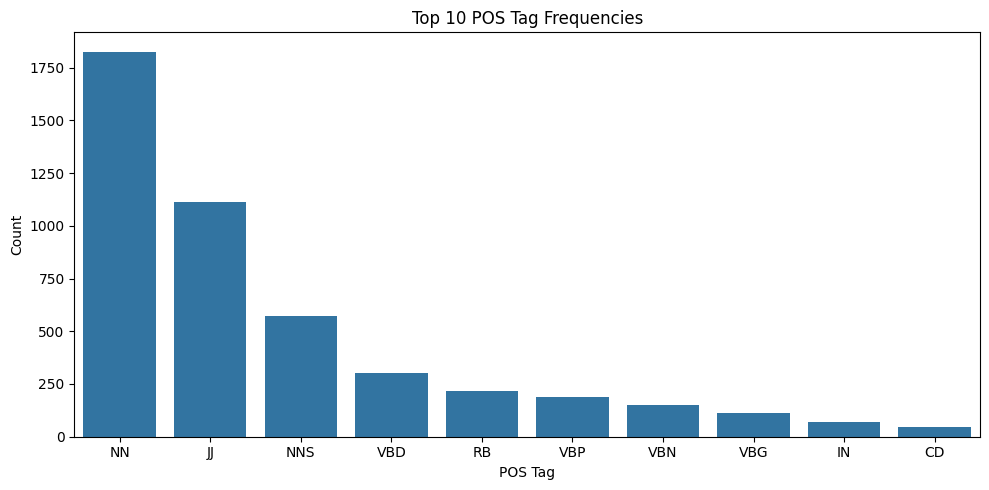


📦 Top 10 Nouns:
world: 75
century: 70
war: 49
states: 30
people: 22
music: 17
union: 16
history: 16
countries: 15
system: 13


In [9]:
# --- INSTALL IF NEEDED ---
# !pip install nltk pandas matplotlib seaborn

# --- IMPORTS ---
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk import word_tokenize, pos_tag
from nltk.corpus import stopwords
from collections import Counter

# --- DOWNLOAD NLTK DATA ---
nltk.download("punkt")
nltk.download("averaged_perceptron_tagger")
nltk.download("stopwords")

# --- LOAD DATA ---
df = pd.read_csv("20th_century_cleaned_events.csv")
print("✅ Loaded event data:")
print(df.head())

# --- JOIN ALL EVENTS TOGETHER ---
text = " ".join(df["event"].astype(str).tolist())

# --- TOKENIZE WORDS ---
tokens = word_tokenize(text)
tokens = [t.lower() for t in tokens if t.isalpha()]

# --- REMOVE STOPWORDS ---
stop_words = set(stopwords.words("english"))
filtered_tokens = [t for t in tokens if t not in stop_words]

# --- POS TAGGING ---
pos_tags = pos_tag(filtered_tokens)

# --- CREATE DF FROM TAGS ---
pos_df = pd.DataFrame(pos_tags, columns=["word", "pos"])
print("\n✅ POS sample:")
print(pos_df.head())

# --- COUNT TOP POS TYPES ---
top_pos = pos_df["pos"].value_counts().head(10)

# --- PLOT ---
plt.figure(figsize=(10, 5))
sns.barplot(x=top_pos.index, y=top_pos.values)
plt.title("Top 10 POS Tag Frequencies")
plt.xlabel("POS Tag")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# --- MOST COMMON NOUNS ---
nouns = pos_df[pos_df["pos"].str.startswith("NN")]["word"]
top_nouns = Counter(nouns).most_common(10)

print("\n📦 Top 10 Nouns:")
for word, count in top_nouns:
    print(f"{word}: {count}")


## 🧠 Task 1.5 – POS Tagging & Analysis

In this task, I performed tokenization, removed stopwords, and applied POS tagging using NLTK. The analysis focused on identifying the most frequent part-of-speech (POS) tags and extracting the most common nouns from the event descriptions.

### 📊 Top 10 POS Tags
The bar chart illustrates the 10 most frequent POS tags. The majority were:

- `NN` (Singular Nouns)
- `JJ` (Adjectives)
- `NNS` (Plural Nouns)
- Various verb forms like `VBD`, `VBP`, `VBN`, etc.

This distribution aligns with the expected structure of historical event descriptions, which tend to emphasize concrete nouns and descriptive phrases.

### 📦 Top 10 Most Frequent Nouns

| Noun       | Count |
|------------|-------|
| world      | 75    |
| century    | 70    |
| war        | 49    |
| states     | 30    |
| people     | 22    |
| music      | 17    |
| union      | 16    |
| history    | 16    |
| countries  | 15    |
| system     | 13    |

These nouns reflect the major historical themes present in 20th-century discourse — such as geopolitics, societal change, and cultural evolution.

### ✅ Reflection
The high frequency of terms like *world*, *war*, *century*, and *states* reinforces the global and political focus of the dataset. Additionally, terms like *music* and *people* reveal some attention to culture and society.

---

